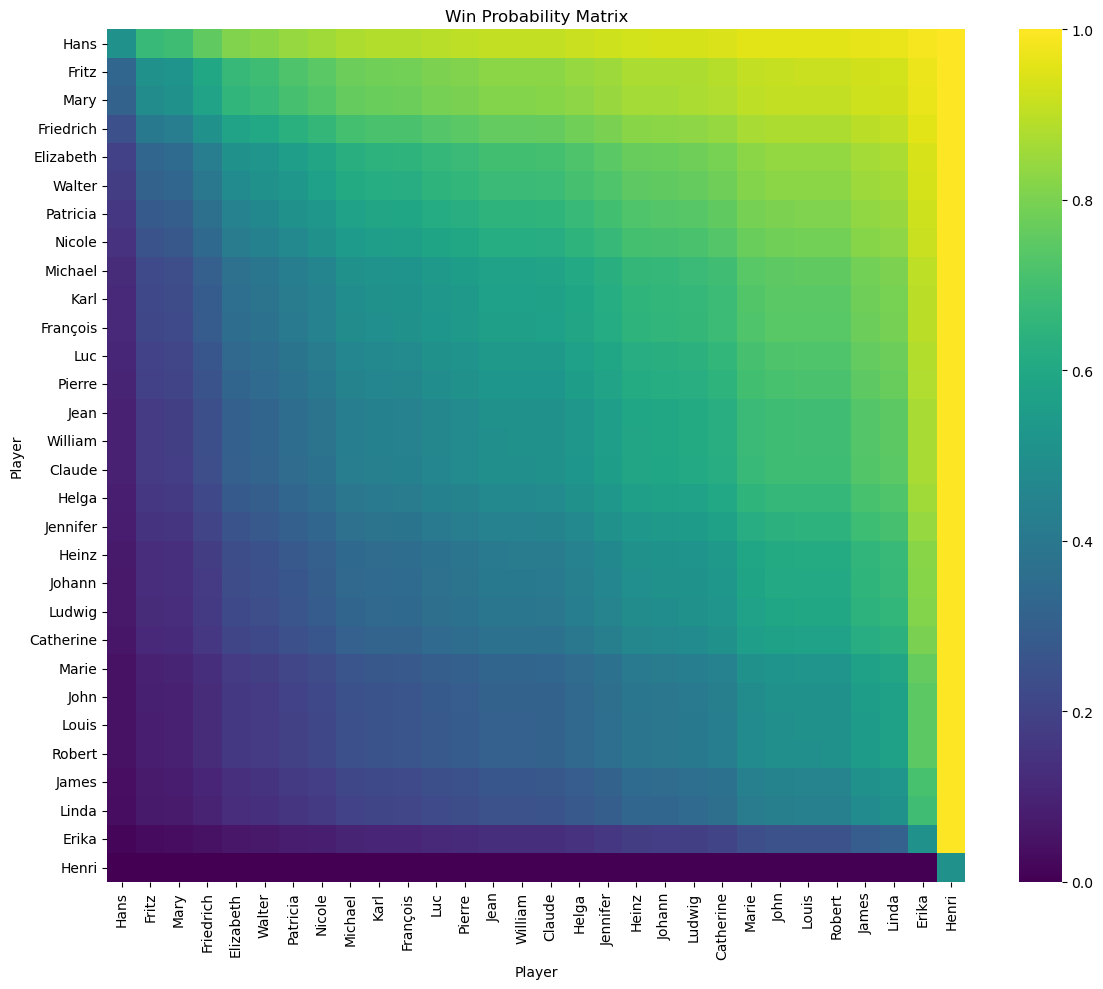

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# Sample lists of French, German, and English names
french_names = ["Louis", "Marie", "Jean", "Claude", "Luc", "François", "Pierre", "Nicole", "Catherine", "Henri"]
german_names = ["Hans", "Johann", "Fritz", "Ludwig", "Heinz", "Karl", "Helga", "Friedrich", "Erika", "Walter"]
english_names = ["John", "Mary", "James", "Patricia", "Robert", "Jennifer", "Michael", "Linda", "William", "Elizabeth"]

nb_players = len(french_names + german_names + english_names)

# Combine all names into one list and ensure we have at least 100 names by repeating the list
all_names = french_names + german_names + english_names
#all_names = all_names * (100 // len(all_names) + 1)  # Repeat the list until it has at least 100 names
players = random.sample(all_names, nb_players)

###############################
# Assign a random skill level to each player (higher is better)

# Generate skill levels using a t-distribution
df = 2  # degrees of freedom
skills = t.rvs(df, size=nb_players)

# Apply a transformation to introduce skewness and kurtosis
skewness_factor = 0.8
skills = np.exp(skills * skewness_factor)

# Normalize the skills to a 0-1 range
skills = (skills - np.min(skills)) / (np.max(skills) - np.min(skills))

##############################

# Function to calculate the probability of player i beating player j
def win_probability(skill_i, skill_j):
    return skill_i / (skill_i + skill_j)

# Create the probability matrix
prob_matrix = np.zeros((nb_players, nb_players))

for i in range(nb_players):
    for j in range(nb_players):
        if i != j:
            prob_matrix[i, j] = win_probability(skills[i], skills[j])
        else:
            prob_matrix[i, j] = 0.5  # The probability of a player winning against themselves is 0.5

# Sort players by skill
sorted_indices = np.argsort(skills)[::-1]
sorted_players = [players[i] for i in sorted_indices]
sorted_matrix = prob_matrix[sorted_indices, :][:, sorted_indices]

# Plotting the probability matrix
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_matrix, xticklabels=sorted_players, yticklabels=sorted_players, cmap="viridis", cbar=True)

# Customize the plot
plt.title("Win Probability Matrix")
plt.xlabel("Player")
plt.ylabel("Player")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


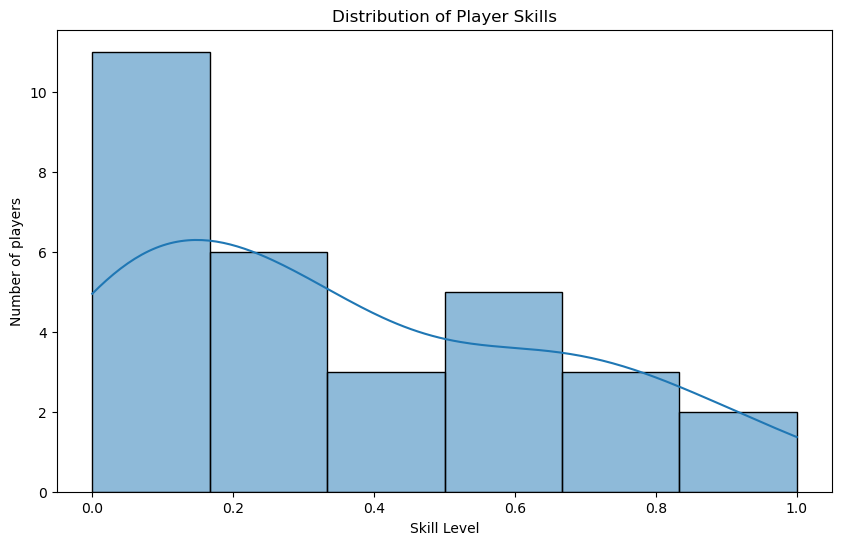

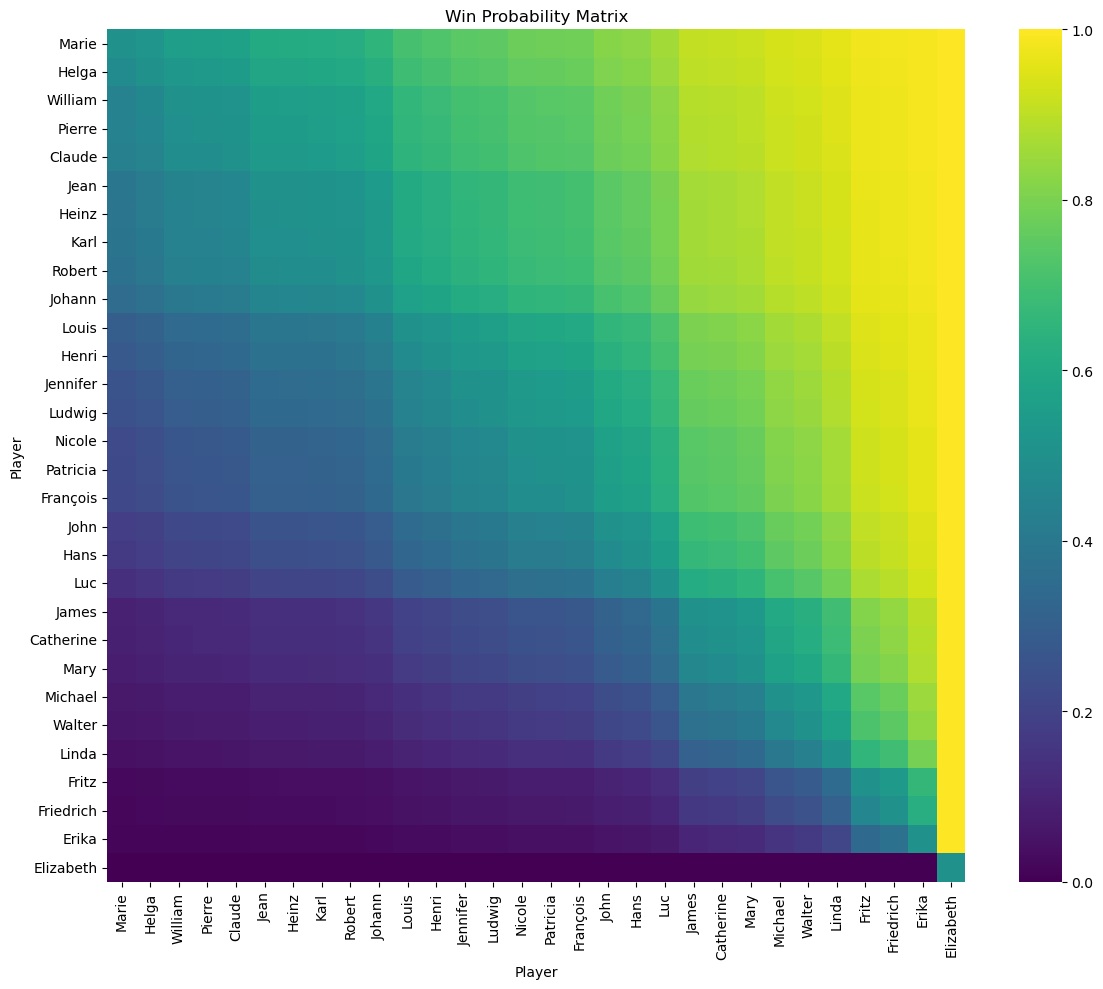

In [7]:
# Sample lists of French, German, and English names
french_names = ["Louis", "Marie", "Jean", "Claude", "Luc", "François", "Pierre", "Nicole", "Catherine", "Henri"]
german_names = ["Hans", "Johann", "Fritz", "Ludwig", "Heinz", "Karl", "Helga", "Friedrich", "Erika", "Walter"]
english_names = ["John", "Mary", "James", "Patricia", "Robert", "Jennifer", "Michael", "Linda", "William", "Elizabeth"]

nb_players = len(french_names + german_names + english_names)

# Combine all names into one list and ensure we have at least 100 names by repeating the list
all_names = french_names + german_names + english_names
players = random.sample(all_names, nb_players)

###############################
# Assign a random skill level to each player (higher is better)

# Generate skill levels using a t-distribution
df = 2  # degrees of freedom
skills = t.rvs(df, size=nb_players)

# Apply a transformation to introduce skewness and kurtosis
skewness_factor = 0.8
skills = np.exp(skills * skewness_factor)

# Normalize the skills to a 0-1 range
skills = (skills - np.min(skills)) / (np.max(skills) - np.min(skills))

# Plot the distribution of skills
plt.figure(figsize=(10, 6))
sns.histplot(skills, kde=True)
plt.title("Distribution of Player Skills")
plt.xlabel("Skill Level")
plt.ylabel("Number of players")
plt.show()

##############################

# Function to calculate the probability of player i beating player j
def win_probability(skill_i, skill_j):
    return skill_i / (skill_i + skill_j)

# Create the probability matrix
prob_matrix = np.zeros((nb_players, nb_players))

for i in range(nb_players):
    for j in range(nb_players):
        if i != j:
            prob_matrix[i, j] = win_probability(skills[i], skills[j])
        else:
            prob_matrix[i, j] = 0.5  # The probability of a player winning against themselves is 0.5

# Sort players by skill
sorted_indices = np.argsort(skills)[::-1]
sorted_players = [players[i] for i in sorted_indices]
sorted_matrix = prob_matrix[sorted_indices, :][:, sorted_indices]

# Plotting the probability matrix
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_matrix, xticklabels=sorted_players, yticklabels=sorted_players, cmap="viridis", cbar=True)

# Customize the plot
plt.title("Win Probability Matrix")
plt.xlabel("Player")
plt.ylabel("Player")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


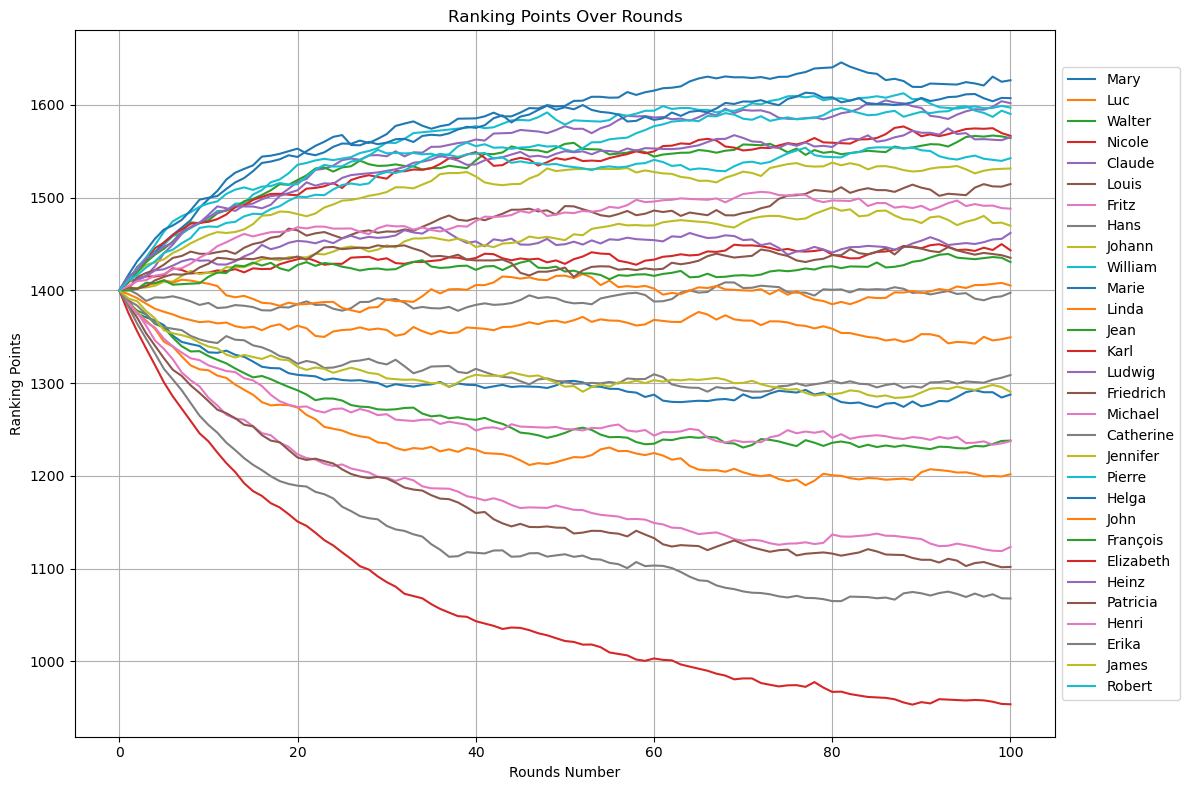

Mary played 5800 games and won 2048 times.
Luc played 5800 games and won 2530 times.
Walter played 5800 games and won 1764 times.
Nicole played 5800 games and won 3160 times.
Claude played 5800 games and won 4157 times.
Louis played 5800 games and won 3543 times.
Fritz played 5800 games and won 1178 times.
Hans played 5800 games and won 2798 times.
Johann played 5800 games and won 3783 times.
William played 5800 games and won 4218 times.
Marie played 5800 games and won 4370 times.
Linda played 5800 games and won 1556 times.
Jean played 5800 games and won 3979 times.
Karl played 5800 games and won 3982 times.
Ludwig played 5800 games and won 3283 times.
Friedrich played 5800 games and won 1096 times.
Michael played 5800 games and won 1761 times.
Catherine played 5800 games and won 2160 times.
Jennifer played 5800 games and won 3342 times.
Pierre played 5800 games and won 4137 times.
Helga played 5800 games and won 4271 times.
John played 5800 games and won 2861 times.
François played 58

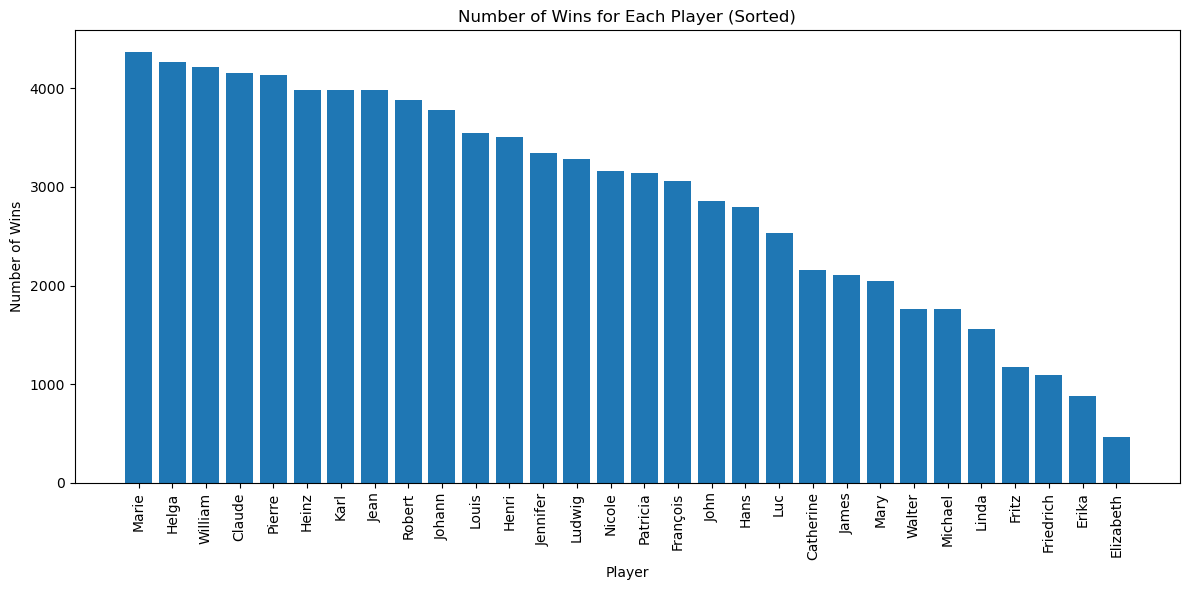

In [109]:
# Random normal std for the game results
rand_std = 0.2

# Simulate # games
num_games = 100

# Number of points intitial
init_points = 1400

#Elo param 
elo_k=1

######################################################


def ranking_calculus(ranking_points,winner,loser) :
    ranking_points[winner] += 0.5  # Winner gains 0.5 points
    ranking_points[loser] -= 0.5  # Loser j loses 0.5 points

    return ranking_points

def ranking_ELO(ranking_points,winner,loser, K=2) :
    expected_win = 1 / (1 + 10 ** ((ranking_points[loser] - ranking_points[winner]) / 400)) #Formule Elo
    ranking_points[winner] = ranking_points[winner] + K * (1 - expected_win)
    ranking_points[loser] = ranking_points[loser] + K * (0 - (1 - expected_win))
    
    return ranking_points
    

# Initialize number of wins, games played, and ranking points for each player
num_wins = np.zeros(nb_players)
num_games_played = np.zeros(nb_players)

ranking_points = init_points*np.ones(nb_players)  # Updated: Initialize all players with ranking points



# Lists to store ranking points over games for each player
ranking_history = [[] for _ in range(nb_players)]

for k in range(nb_players):
    ranking_history[k].append(init_points)  # Start with 0 points before any games

for game in range(num_games):
    for i in range(nb_players):
        for j in range(nb_players):
            if i != j:
                # Increment games played for both players
                num_games_played[i] += 1
                num_games_played[j] += 1
                
                # Calculate win probability for player i against player j
                prob_i_wins = win_probability(skills[i], skills[j])
                
                # Add randomness with a normal distribution around the win probability -> Random factor in the game results
                rand_factor = np.random.normal(loc=prob_i_wins, scale=rand_std)  # Adjust scale for desired randomness
                
                # Determine winner of the game -> Compare to uniform rand to determine the winner
                if np.random.rand() < rand_factor:
                    num_wins[i] += 1  # Player i wins the game
                    #ranking_points=ranking_calculus(ranking_points,i,j)
                    ranking_points=ranking_ELO(ranking_points,i,j,elo_k)
                else:
                    num_wins[j] += 1  # Player j wins the game
                    #ranking_points=ranking_calculus(ranking_points,j,i)
                    ranking_points=ranking_ELO(ranking_points,j,i,elo_k)

    # Record ranking points after each game
    for k in range(nb_players):
        ranking_history[k].append(ranking_points[k])

# Plotting ranking points over games
plt.figure(figsize=(12, 8))
for k in range(nb_players):
    plt.plot(np.arange(num_games+1), ranking_history[k], label=players[k])

plt.title('Ranking Points Over Rounds')
plt.xlabel('Rounds Number')
plt.ylabel('Ranking Points')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Sort players by number of wins
sorted_indices = np.argsort(num_wins)[::-1]
sorted_players = [players[i] for i in sorted_indices]
sorted_num_wins = num_wins[sorted_indices]

# Print number of games played by each player
for i in range(nb_players):
    print(f"{players[i]} played {int(num_games_played[i])} games and won {int(num_wins[i])} times.")

# Plot histogram of wins (sorted)
plt.figure(figsize=(12, 6))
plt.bar(np.arange(nb_players), sorted_num_wins, tick_label=sorted_players)
plt.title('Number of Wins for Each Player (Sorted)')
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


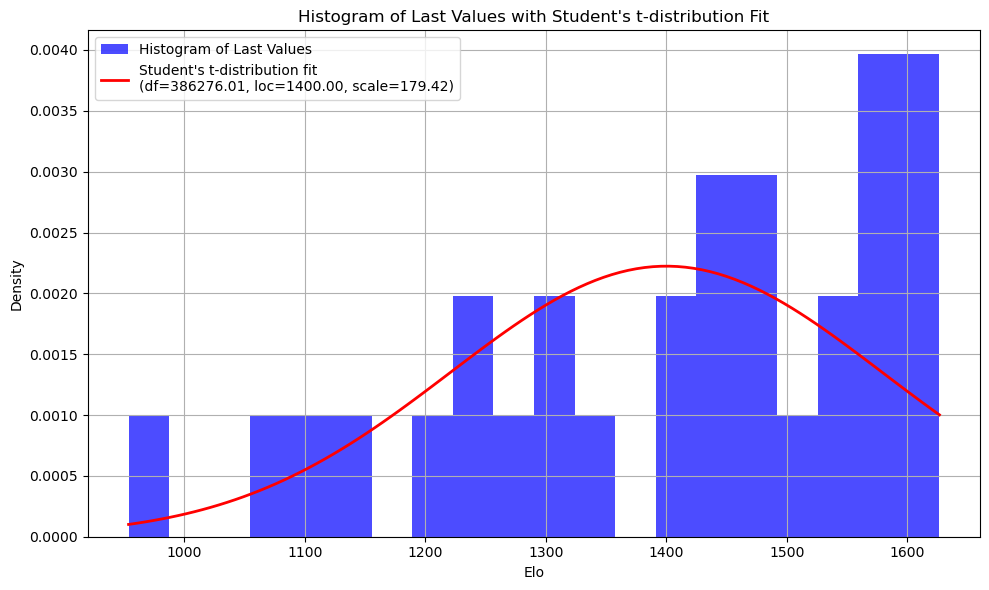

In [110]:
# Extract last values from ranking_history
last_values = [history[-1] for history in ranking_history]

# Plot histogram of last values
plt.figure(figsize=(10, 6))
plt.hist(last_values, bins=20, density=True, alpha=0.7, color='blue', label='Histogram of Last Values')

# Fit a Student's t-distribution to the data
df, loc, scale = t.fit(last_values)
x = np.linspace(min(last_values), max(last_values), 100)
pdf = t.pdf(x, df, loc, scale)
plt.plot(x, pdf, 'r-', lw=2, label=f'Student\'s t-distribution fit\n(df={df:.2f}, loc={loc:.2f}, scale={scale:.2f})')

plt.title('Histogram of Last Values with Student\'s t-distribution Fit')
plt.xlabel('Elo')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

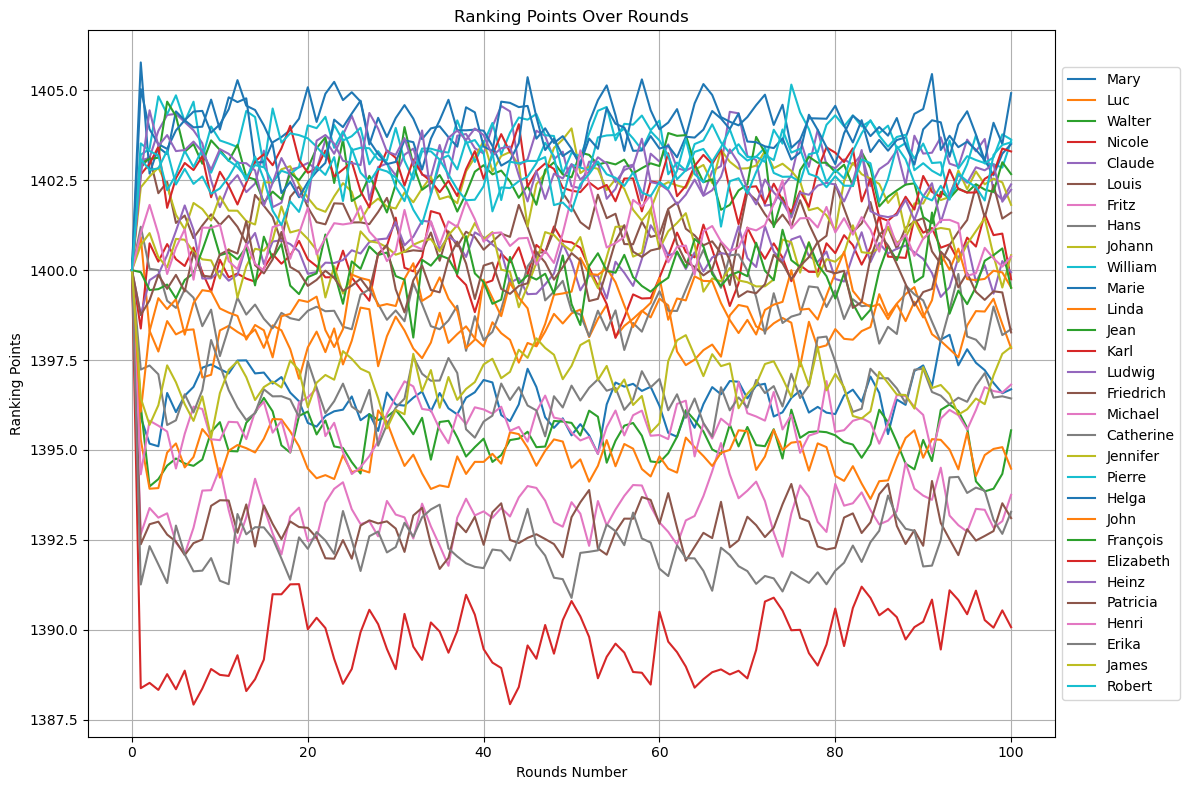

Mary played 5800 games and won 2029 times.
Luc played 5800 games and won 2576 times.
Walter played 5800 games and won 1684 times.
Nicole played 5800 games and won 3228 times.
Claude played 5800 games and won 4077 times.
Louis played 5800 games and won 3541 times.
Fritz played 5800 games and won 1165 times.
Hans played 5800 games and won 2796 times.
Johann played 5800 games and won 3861 times.
William played 5800 games and won 4218 times.
Marie played 5800 games and won 4361 times.
Linda played 5800 games and won 1554 times.
Jean played 5800 games and won 3976 times.
Karl played 5800 games and won 3963 times.
Ludwig played 5800 games and won 3248 times.
Friedrich played 5800 games and won 1062 times.
Michael played 5800 games and won 1824 times.
Catherine played 5800 games and won 2040 times.
Jennifer played 5800 games and won 3306 times.
Pierre played 5800 games and won 4149 times.
Helga played 5800 games and won 4295 times.
John played 5800 games and won 2864 times.
François played 58

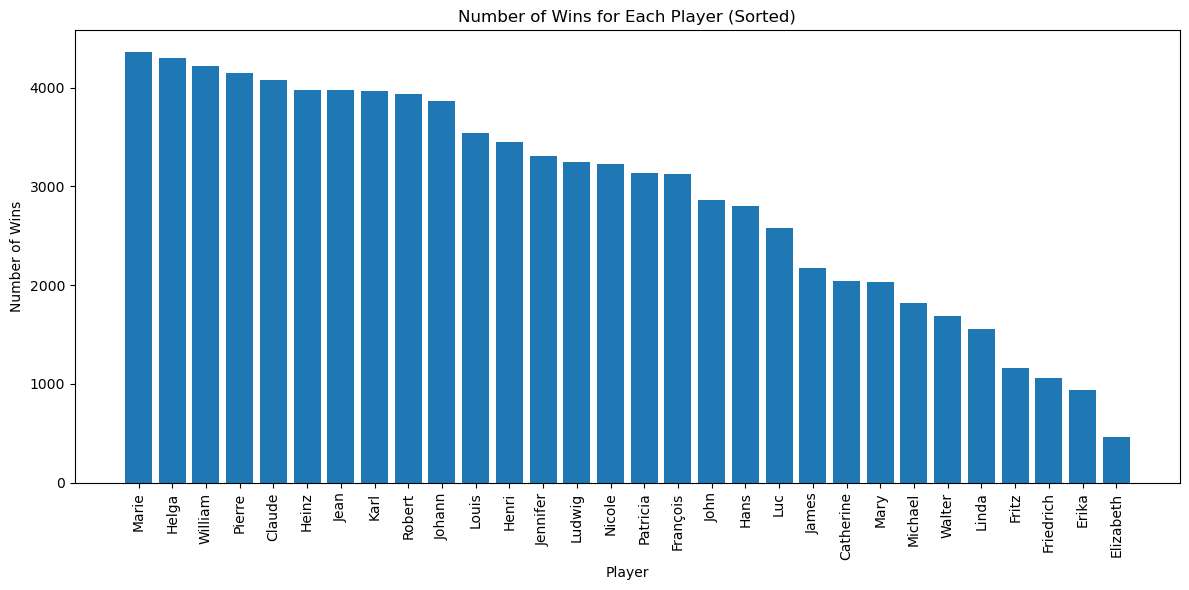

In [112]:
from trueskill import Rating, quality_1vs1, rate_1vs1
#https://trueskill.org/#trueskill.TrueSkill.create_rating

# Random normal std for the game results
rand_std = 0.2

# Simulate # games
num_games = 100

# Number of points intitial
init_points = Rating(mu=1400.000, sigma=8.333)



#Elo param 
elo_k=1

######################################################


def ranking_TrueSkill(ranking_points, winner, loser):
    
    win_rating, los_rating = ranking_points[winner], ranking_points[loser]
    if isinstance(win_rating, list):
        win_rating = win_rating[0]
    if isinstance(los_rating, list):
        los_rating = los_rating[0]
    
    

    ranking_points[winner], ranking_points[loser] = rate_1vs1(win_rating, los_rating)
    

    return ranking_points


def ranking_calculus(ranking_points,winner,loser) :
    ranking_points[winner] += 0.5  # Winner gains 0.5 points
    ranking_points[loser] -= 0.5  # Loser j loses 0.5 points

    return ranking_points

def ranking_ELO(ranking_points,winner,loser, K=2) :
    expected_win = 1 / (1 + 10 ** ((ranking_points[loser] - ranking_points[winner]) / 400)) #Formule Elo
    ranking_points[winner] = ranking_points[winner] + K * (1 - expected_win)
    ranking_points[loser] = ranking_points[loser] + K * (0 - (1 - expected_win))
    
    return ranking_points
    

# Initialize number of wins, games played, and ranking points for each player
num_wins = np.zeros(nb_players)
num_games_played = np.zeros(nb_players)

ranking_points = [init_points for _ in range(30)]

# Lists to store ranking points over games for each player
ranking_history = [[] for _ in range(nb_players)]

for k in range(nb_players):
    init_mu = init_points.mu
    ranking_history[k].append(init_mu)  # Start with 0 points before any games

for game in range(num_games):

    for i in range(nb_players):
        for j in range(nb_players):
            if i != j:
                # Increment games played for both players
                num_games_played[i] += 1
                num_games_played[j] += 1
                
                # Calculate win probability for player i against player j
                prob_i_wins = win_probability(skills[i], skills[j])
                
                # Add randomness with a normal distribution around the win probability -> Random factor in the game results
                rand_factor = np.random.normal(loc=prob_i_wins, scale=rand_std)  # Adjust scale for desired randomness
                
                # Determine winner of the game -> Compare to uniform rand to determine the winner
                if np.random.rand() < rand_factor:
                    num_wins[i] += 1  # Player i wins the game
                    #ranking_points=ranking_calculus(ranking_points,i,j)
                    #ranking_points=ranking_ELO(ranking_points,i,j,elo_k)
                    ranking_points = ranking_TrueSkill(ranking_points, i, j)
                    
                else:
                    num_wins[j] += 1  # Player j wins the game
                    #ranking_points=ranking_calculus(ranking_points,j,i)
                    #ranking_points=ranking_ELO(ranking_points,j,i,elo_k)
                    ranking_points = ranking_TrueSkill(ranking_points, j, i)

    # Record ranking points after each game
    for k in range(nb_players):
        ranking_history[k].append(ranking_points[k].mu)

# Plotting ranking points over games
plt.figure(figsize=(12, 8))
for k in range(nb_players):
    plt.plot(np.arange(num_games+1), ranking_history[k], label=players[k])

plt.title('Ranking Points Over Rounds')
plt.xlabel('Rounds Number')
plt.ylabel('Ranking Points')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Sort players by number of wins
sorted_indices = np.argsort(num_wins)[::-1]
sorted_players = [players[i] for i in sorted_indices]
sorted_num_wins = num_wins[sorted_indices]

# Print number of games played by each player
for i in range(nb_players):
    print(f"{players[i]} played {int(num_games_played[i])} games and won {int(num_wins[i])} times.")

# Plot histogram of wins (sorted)
plt.figure(figsize=(12, 6))
plt.bar(np.arange(nb_players), sorted_num_wins, tick_label=sorted_players)
plt.title('Number of Wins for Each Player (Sorted)')
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
from trueskill import Rating, quality_1vs1, rate_1vs1
alice, bob = Rating(25), Rating(30)  # assign Alice and Bob's ratings

print (alice)
if quality_1vs1(alice, bob) < 0.50:
    print('This match seems to be not so fair')
alice, bob = rate_1vs1(alice, bob)  # update the ratings after the match
print (alice)

trueskill.Rating(mu=25.000, sigma=8.333)
This match seems to be not so fair
trueskill.Rating(mu=30.768, sigma=7.030)


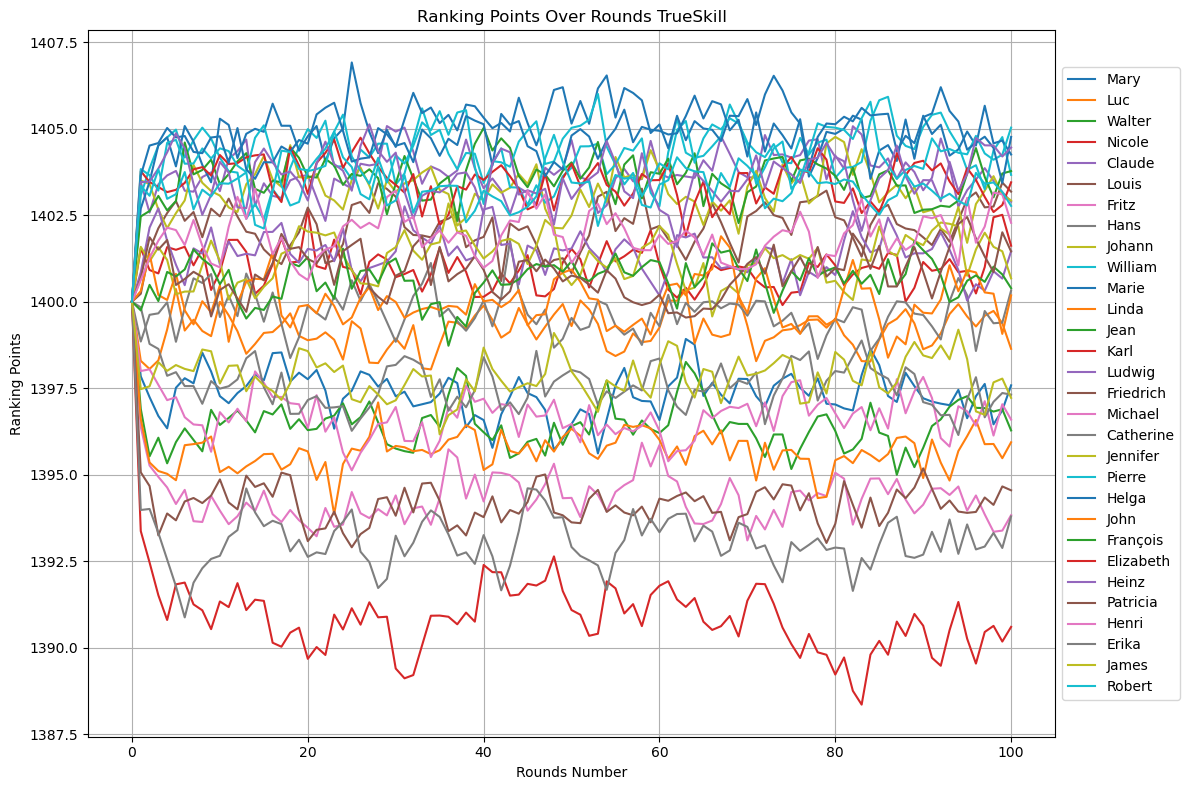

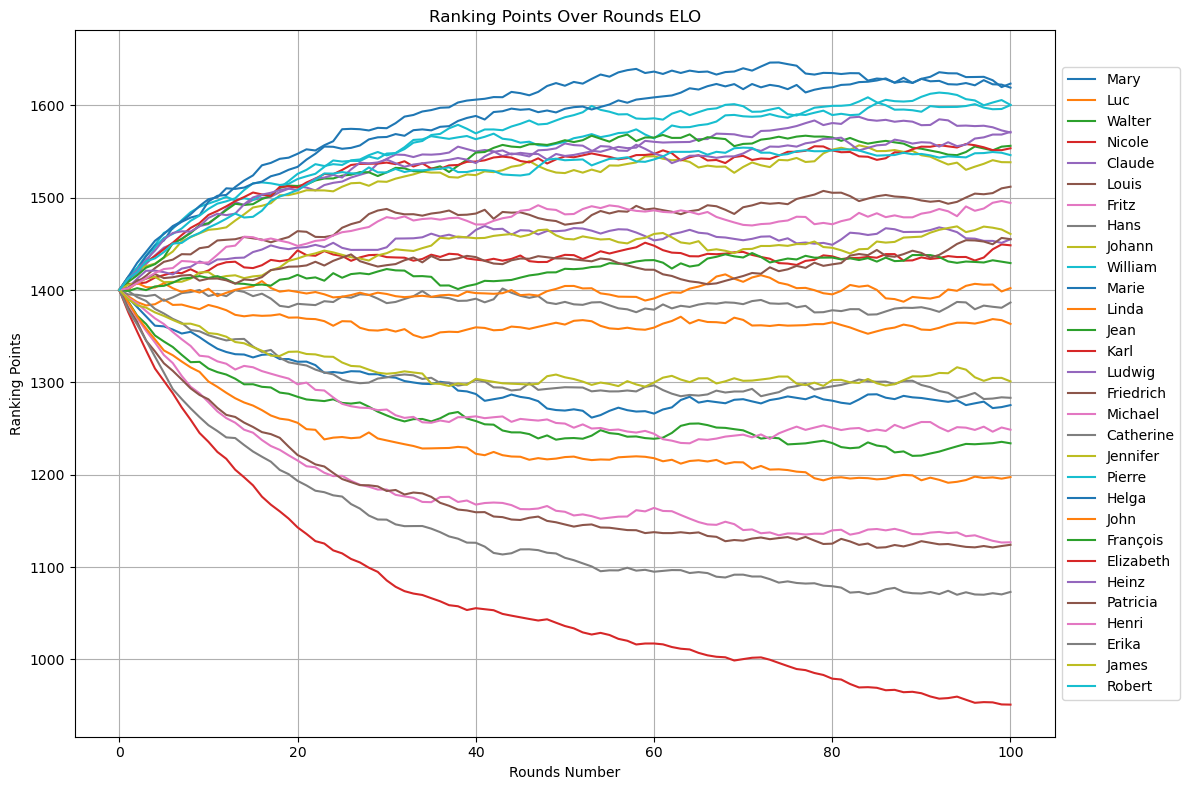

Mary played 5800 games and won 2015 times.
Luc played 5800 games and won 2573 times.
Walter played 5800 games and won 1739 times.
Nicole played 5800 games and won 3163 times.
Claude played 5800 games and won 4045 times.
Louis played 5800 games and won 3547 times.
Fritz played 5800 games and won 1169 times.
Hans played 5800 games and won 2758 times.
Johann played 5800 games and won 3862 times.
William played 5800 games and won 4175 times.
Marie played 5800 games and won 4410 times.
Linda played 5800 games and won 1528 times.
Jean played 5800 games and won 3987 times.
Karl played 5800 games and won 3947 times.
Ludwig played 5800 games and won 3304 times.
Friedrich played 5800 games and won 1131 times.
Michael played 5800 games and won 1818 times.
Catherine played 5800 games and won 2096 times.
Jennifer played 5800 games and won 3250 times.
Pierre played 5800 games and won 4206 times.
Helga played 5800 games and won 4339 times.
John played 5800 games and won 2864 times.
François played 58

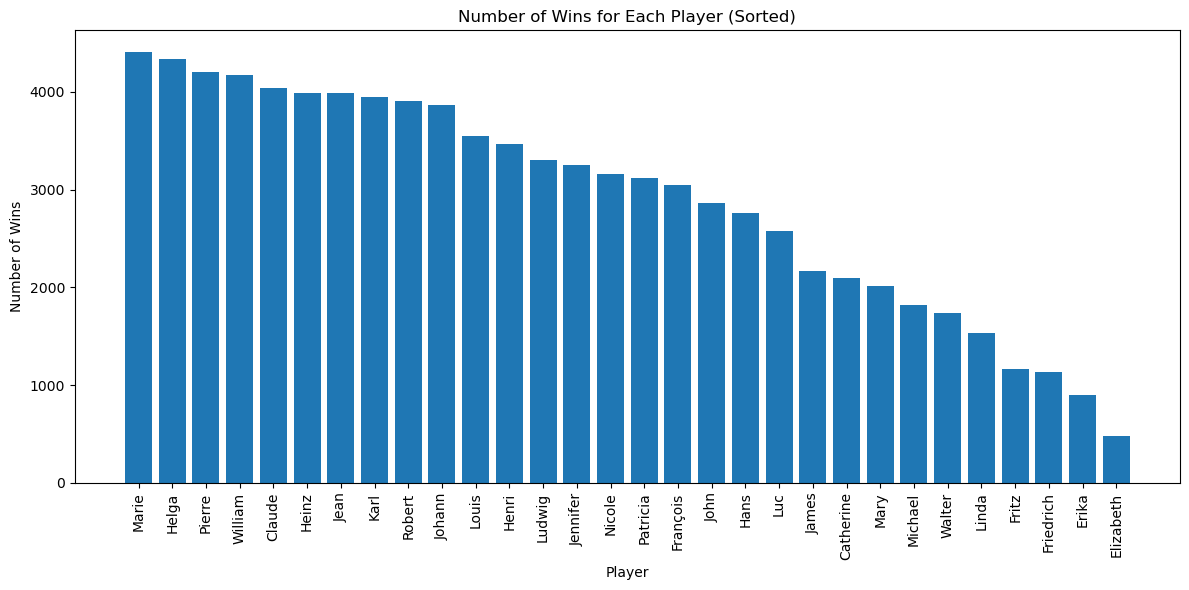

In [119]:
from trueskill import Rating, quality_1vs1, rate_1vs1
#https://trueskill.org/#trueskill.TrueSkill.create_rating

# Normal std for the game results randomness
rand_std = 0.2

# Simulate # games
num_games = 100

# Number of points intitial
init_points = Rating(mu=1400.000, sigma=2)

init_points_elo = 1400


#Elo param 
elo_k=1

######################################################


def ranking_TrueSkill(ranking_points, winner, loser):
    
    win_rating, los_rating = ranking_points[winner], ranking_points[loser]
    if isinstance(win_rating, list):
        win_rating = win_rating[0]
    if isinstance(los_rating, list):
        los_rating = los_rating[0]
    
    

    ranking_points[winner], ranking_points[loser] = rate_1vs1(win_rating, los_rating)
    

    return ranking_points


def ranking_calculus(ranking_points,winner,loser) :
    ranking_points[winner] += 0.5  # Winner gains 0.5 points
    ranking_points[loser] -= 0.5  # Loser j loses 0.5 points

    return ranking_points

def ranking_ELO(ranking_points,winner,loser, K=2) :
    expected_win = 1 / (1 + 10 ** ((ranking_points[loser] - ranking_points[winner]) / 400)) #Formule Elo
    ranking_points[winner] = ranking_points[winner] + K * (1 - expected_win)
    ranking_points[loser] = ranking_points[loser] + K * (0 - (1 - expected_win))
    
    return ranking_points
    

# Initialize number of wins, games played, and ranking points for each player
num_wins = np.zeros(nb_players)
num_games_played = np.zeros(nb_players)



#Init Trueskill
ranking_points = [init_points for _ in range(30)]
# Lists to store ranking points over games for each player
ranking_history = [[] for _ in range(nb_players)]
for k in range(nb_players):
    init_mu = init_points.mu
    ranking_history[k].append(init_mu)  # Start with 0 points before any games

    
# Init ELO    
ranking_points_elo = [init_points_elo for _ in range(30)]
# Lists to store ranking points over games for each player
ranking_history_elo = [[] for _ in range(nb_players)]
for k in range(nb_players):
    ranking_history_elo[k].append(init_points_elo)  # Start with 0 points before any games


for game in range(num_games):
    for i in range(nb_players):
        for j in range(nb_players):
            if i != j:
                # Increment games played for both players
                num_games_played[i] += 1
                num_games_played[j] += 1
                
                # Calculate win probability for player i against player j
                prob_i_wins = win_probability(skills[i], skills[j])
                
                # Add randomness with a normal distribution around the win probability -> Random factor in the game results
                rand_factor = np.random.normal(loc=prob_i_wins, scale=rand_std)  # Adjust scale for desired randomness
                
                # Determine winner of the game -> Compare to uniform rand to determine the winner
                if np.random.rand() < rand_factor:
                    num_wins[i] += 1  # Player i wins the game
                    #ranking_points=ranking_calculus(ranking_points,i,j)
                    ranking_points_elo=ranking_ELO(ranking_points_elo,i,j,elo_k)
                    ranking_points = ranking_TrueSkill(ranking_points, i, j)
                    
                else:
                    num_wins[j] += 1  # Player j wins the game
                    #ranking_points=ranking_calculus(ranking_points,j,i)
                    ranking_points_elo=ranking_ELO(ranking_points_elo,j,i,elo_k)
                    ranking_points = ranking_TrueSkill(ranking_points, j, i)

    # Record ranking points after each game Trueskill
    for k in range(nb_players):
        ranking_history[k].append(ranking_points[k].mu)
        
    # Record ranking points after each game ELO
    for k in range(nb_players):
        ranking_history_elo[k].append(ranking_points_elo[k])

# Plotting ranking points over games Trueskill
plt.figure(figsize=(12, 8))
for k in range(nb_players):
    plt.plot(np.arange(num_games+1), ranking_history[k], label=players[k])

plt.title('Ranking Points Over Rounds TrueSkill')
plt.xlabel('Rounds Number')
plt.ylabel('Ranking Points')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting ranking points over games ELO
plt.figure(figsize=(12, 8))
for k in range(nb_players):
    plt.plot(np.arange(num_games+1), ranking_history_elo[k], label=players[k])

plt.title('Ranking Points Over Rounds ELO')
plt.xlabel('Rounds Number')
plt.ylabel('Ranking Points')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Sort players by number of wins
sorted_indices = np.argsort(num_wins)[::-1]
sorted_players = [players[i] for i in sorted_indices]
sorted_num_wins = num_wins[sorted_indices]

# Print number of games played by each player
for i in range(nb_players):
    print(f"{players[i]} played {int(num_games_played[i])} games and won {int(num_wins[i])} times.")

# Plot histogram of wins (sorted)
plt.figure(figsize=(12, 6))
plt.bar(np.arange(nb_players), sorted_num_wins, tick_label=sorted_players)
plt.title('Number of Wins for Each Player (Sorted)')
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()